# Relational db

In [1]:
import sqlite3 as sql

In [2]:
conn=sql.connect('customers.db')

In [3]:
# cursor object to run sql queries
action=conn.cursor()

In [5]:
action.execute("DROP TABLE IF EXISTS customers")
action.execute("""
CREATE TABLE customers (
    first TEXT,
    last TEXT,
    email TEXT
)
""")

conn.commit()

In [9]:
action.execute("INSERT INTO customers VALUES('John','Dunn','jd@gmail.com')")

In [11]:
# fetchone(),fetchmany(),fetchall()
action.execute("SELECT * FROM customers")
action.fetchall()

[('John', 'Dunn', 'jd@gmail.com')]

In [12]:
import pandas as pd

In [13]:
pd.read_sql("select * from customers",conn)

,first,last,email
0,John,Dunn,jd@gmail.com


In [14]:
conn.close()

# Analysing NDA data with SQLite3

In [15]:
import pandas as pd
import sqlite3 as sq

In [16]:
conn=sql.connect('nba.db')
action=conn.cursor()

In [18]:
nba=pd.read_csv('nbaplayersdraft.csv')

In [19]:
type(nba)

pandas.core.frame.DataFrame

In [24]:
nba=nba[['player','year','overall_pick','team','college','years_active','games','minutes_played','points','field_goal_percentage','free_throw_percentage']]

In [27]:
action.execute("DROP TABLE IF EXISTS players")
action.execute("""CREATE TABLE players(
player text,
year integer,
overall_pick integer,
team text,
college text,
years_active integer,
games integer,
minutes_played integer,
points integer,
field_goal_percentage real,
free_throw_percentage real
)""")
conn.commit()

In [28]:
nba.to_sql('players',conn,if_exists='append',index=False)

1922

In [30]:
action.execute("Select * from players")

In [31]:
action.fetchmany(3)

[('Pervis Ellison',
  1989,
  1,
  'SAC',
  'Louisville',
  11,
  474,
  11593,
  4494,
  0.51,
  0.689),
 ('Danny Ferry', 1989, 2, 'LAC', 'Duke', 13, 917, 18133, 6439, 0.446, 0.84),
 ('Sean Elliott',
  1989,
  3,
  'SAS',
  'Arizona',
  12,
  742,
  24502,
  10544,
  0.465,
  0.799)]

In [32]:
action.execute("SELECT count(*) from players")
action.fetchall()

[(1922,)]

In [33]:
action.execute("SELECT avg(games) from players")
action.fetchall()

[(348.04254044337927,)]

In [34]:
action.execute("SELECT avg(games) from players where overall_pick<=10")
action.fetchall()

[(594.6878787878788,)]

In [35]:
action.execute("select distinct college from players order by college")
action.fetchall()

[(None,),
 ('Alabama',),
 ('Alabama State University',),
 ('Arizona',),
 ('Arizona State',),
 ('Arkansas',),
 ('Arkansas State University',),
 ('Auburn',),
 ('Augsburg College',),
 ('Austin Peay State University',),
 ('BYU',),
 ('Ball State University',),
 ('Barton County Community College',),
 ('Baylor',),
 ('Belmont',),
 ('Benedict College',),
 ('Boise State',),
 ('Boston College',),
 ('Bowling Green',),
 ('Bradley',),
 ('Brigham Young University Hawaii',),
 ('Bucknell',),
 ('Butler',),
 ('Butler County Community College',),
 ('Cal State Fullerton',),
 ('Cal State Long Beach',),
 ('Cal State-Bakersfield',),
 ('California',),
 ('Central Connecticut State University',),
 ('Central Florida',),
 ('Central Michigan University',),
 ('Central State University',),
 ('Chattanooga',),
 ('Christopher Newport University',),
 ('Cincinnati',),
 ('Clemson',),
 ('Cleveland State University',),
 ('Colgate',),
 ('College of Charleston',),
 ('College of the Sequoias',),
 ('Colorado',),
 ('Colorado Stat

In [36]:
action.execute("select count(distinct college) from players order by college")
action.fetchall()

[(237,)]

In [39]:
action.execute("select avg(field_goal_percentage) from players where overall_pick<=10")
action.fetchall()

[(0.45735757575757574,)]

# xmltree basics

In [40]:
import xml.etree.ElementTree as et

In [41]:
file='countries.xml'
tree=et.parse(file)

In [42]:
tree

In [43]:
root=tree.getroot()

In [44]:
root.tag

'countries'

In [46]:
root[0].text

'Afghanistan'

In [49]:
for child in root:
    print(child.text+"-", end="",flush=True)
    for k,v in child.attrib.items():
        if k=='iso':
            print(k + ":",v)

Afghanistan-iso: 4
Albania-iso: 8
Algeria-iso: 12
American Samoa-iso: 16
Andorra-iso: 20
Angola-iso: 24
Anguilla-iso: 660
Antarctica-iso: 10
Antigua And Barbuda-iso: 28
Argentina-iso: 32
Armenia-iso: 51
Aruba-iso: 533
Australia-iso: 36
Austria-iso: 40
Azerbaijan-iso: 31
Bahamas-iso: 44
Bahrain-iso: 48
Bangladesh-iso: 50
Barbados-iso: 52
Belarus-iso: 112
Belgium-iso: 56
Belize-iso: 84
Benin-iso: 204
Bermuda-iso: 60
Bhutan-iso: 64
Bolivia-iso: 68
Bosnia And Herzegovina-iso: 70
Botswana-iso: 72
Bouvet Island-iso: 74
Brazil-iso: 76
British Indian Ocean continent-iso: 86
Brunei Darussalam-iso: 96
Bulgaria-iso: 100
Burkina Faso-iso: 854
Burundi-iso: 108
Cambodia-iso: 116
Cameroon-iso: 120
Canada-iso: 124
Cape Verde-iso: 132
Cayman Islands-iso: 136
Central African Republic-iso: 140
Chad-iso: 148
Chile-iso: 152
China-iso: 156
Christmas Island-iso: 162
Cocos (Keeling) Islands-iso: 166
Colombia-iso: 170
Comoros-iso: 174
Congo-iso: 178
Cook Islands-iso: 184
Costa Rica-iso: 188
Cote D'Ivoire-iso: 

# Dict to namedtuple

In [50]:
from collections import namedtuple

In [51]:
stock_data={'Symbol':'NA','Name':'NA','Price':'NA'}

In [52]:
ticker=namedtuple('ticker',stock_data)

In [53]:
ford=ticker(Symbol='F',Name='Ford Motor',Price=15)

In [54]:
ford

ticker(Symbol='F', Name='Ford Motor', Price=15)

# CSV data

In [66]:
import csv
import matplotlib.pyplot as plt

In [67]:
goog='GOOG.csv'

In [68]:
with open(goog,'r') as data:
    reader=csv.reader(data)
    header=next(reader)
    goog_csv=[row for row in reader]
    
# reader = csv.reader(data)
# Uses Python’s built-in csv module to create an iterator (reader) that reads rows from the file and splits them into lists by commas.
# header = next(reader)
# Reads the first row only, which usually contains the column names.
# Stores that in the variable header.

In [69]:
goog_csv[0]

['2004-08-23',
 '56.52811813354492',
 '54.321388244628906',
 '55.168216705322266',
 '54.49573516845703',
 '18342897.0',
 '54.49573516845703']

In [70]:
header

['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']

In [74]:
from matplotlib import rcParams
rcParams['figure.figsize']=16,6

dates=[row[0] for row in goog_csv]
volume=[int(float(row[5])) for row in goog_csv]

In [75]:
volume[0]

18342897

[]

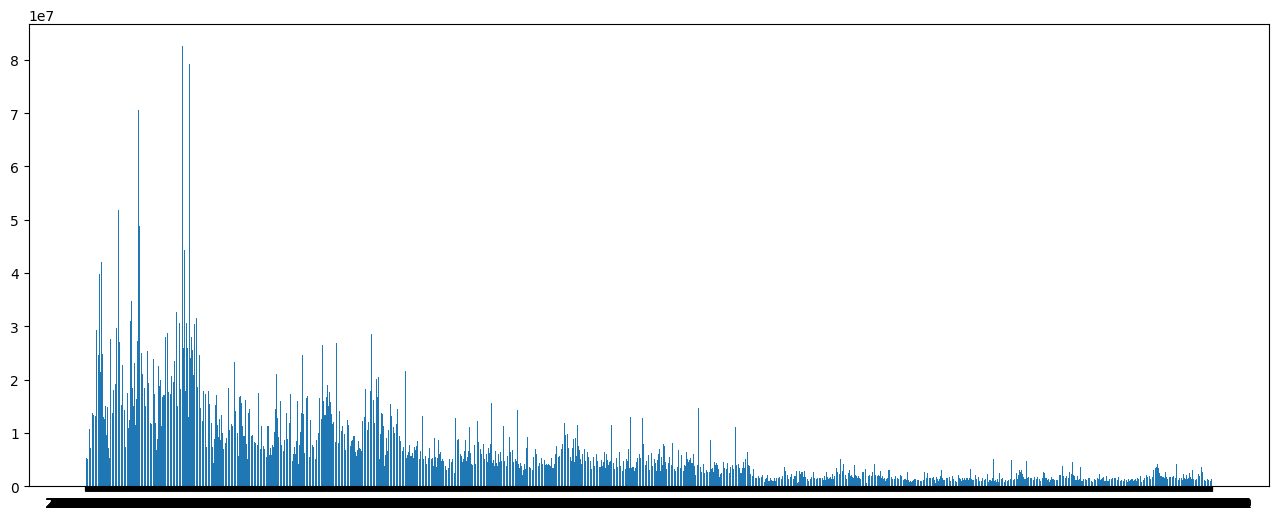

In [79]:
plt.bar(dates,volume)
plt.plot()

In [80]:
# by pandas

In [81]:
import pandas as pd

In [82]:
googl=pd.read_csv(goog)

In [85]:
googl.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
1,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086
3,2004-08-26,53.773445,52.134586,52.279045,53.753517,7128620.0,53.753517
4,2004-08-27,54.107193,52.647663,53.848164,52.876804,6241307.0,52.876804


# ipinfo library

In [87]:
import sys
!{sys.executable} -m pip install ipinfo


You should consider upgrading via the '/home/jyoti/fastapi-env/bin/python -m pip install --upgrade pip' command.


In [90]:
import ipinfo

access_token = "04d016e94eddde"
handler = ipinfo.getHandler(access_token)

details = handler.getDetails()
print(details.all)


{'ip': '117.200.53.211', 'city': 'Mysuru', 'region': 'Karnataka', 'country': 'IN', 'loc': '12.2979,76.6393', 'org': 'AS9829 National Internet Backbone', 'postal': '570028', 'timezone': 'Asia/Kolkata', 'country_name': 'India', 'isEU': False, 'country_flag_url': 'https://cdn.ipinfo.io/static/images/countries-flags/IN.svg', 'country_flag': {'emoji': '🇮🇳', 'unicode': 'U+1F1EE U+1F1F3'}, 'country_currency': {'code': 'INR', 'symbol': '₹'}, 'continent': {'code': 'AS', 'name': 'Asia'}, 'latitude': '12.2979', 'longitude': '76.6393'}


In [91]:
details.city

'Mysuru'

In [92]:
details.ip

'117.200.53.211'

In [93]:
details.country

'IN'

In [94]:
details.country_name

'India'

# csv to json

In [96]:
import pandas as pd

In [98]:
goog=pd.read_csv('GOOG.csv')

In [99]:
goog.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
1,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086
3,2004-08-26,53.773445,52.134586,52.279045,53.753517,7128620.0,53.753517
4,2004-08-27,54.107193,52.647663,53.848164,52.876804,6241307.0,52.876804


In [102]:
goog.to_json(orient='split')

'{"columns":["Date","High","Low","Open","Close","Volume","Adj Close"],"index":[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257

In [103]:
import json

In [104]:
json.loads(goog.to_json(orient='records'))

[{'Date': '2004-08-23',
  'High': 56.5281181335,
  'Low': 54.3213882446,
  'Open': 55.1682167053,
  'Close': 54.4957351685,
  'Volume': 18342897.0,
  'Adj Close': 54.4957351685},
 {'Date': '2004-08-24',
  'High': 55.5916290283,
  'Low': 51.5916213989,
  'Open': 55.4123001099,
  'Close': 52.2391967773,
  'Volume': 15319808.0,
  'Adj Close': 52.2391967773},
 {'Date': '2004-08-25',
  'High': 53.7983512878,
  'Low': 51.7460441589,
  'Open': 52.2840270996,
  'Close': 52.8020858765,
  'Volume': 9232276.0,
  'Adj Close': 52.8020858765},
 {'Date': '2004-08-26',
  'High': 53.7734451294,
  'Low': 52.1345863342,
  'Open': 52.279045105,
  'Close': 53.7535171509,
  'Volume': 7128620.0,
  'Adj Close': 53.7535171509},
 {'Date': '2004-08-27',
  'High': 54.1071929932,
  'Low': 52.6476631165,
  'Open': 53.8481636047,
  'Close': 52.8768043518,
  'Volume': 6241307.0,
  'Adj Close': 52.8768043518},
 {'Date': '2004-08-30',
  'High': 52.5480384827,
  'Low': 50.8145332336,
  'Open': 52.4434280396,
  'Close': 